<a href="https://colab.research.google.com/github/Tower5954/Dog-vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐕 End-to-end Multi-class Dog Breed Classification 🐕

This notebook builds an end-to-end multi-class image classifier using 
Tensorflow 2.0 and Tensorflow Hub

## 1. Problem

Identifying the breed of dog given an image of a dog. 

## 2. Data

The data we are using is from Kaggle's dog breed identification competion.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of 
each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


## 4. Features

Some information about the data:

* We are dealing with images (unstructured data), so it is probably best that 
we use deep learning/transfer learning.

* There are 120 breeds of dog( This means that there are 120 different classes). 

* There are 10,000 + images in the training set.
(These image have labels).

* There are 10,000 + images in the test set.
(These images do not have labels, as we will want to predict them.)


In [ ]:
# Unzip the uploaded file into Google drive.
#!unzip "drive/My Drive/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

Streaming output truncated to the last 5000 lines.
  inflating: drive/My Drive/Dog Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/My Drive/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/My Drive/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/My Drive/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/My Drive/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/My Drive/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/My Drive/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/My Drive/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/My Drive/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/My Drive/Dog Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/My Drive/Dog Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/My Dri

### Get our workspace ready

* Import Tensorflow 2.x 
* Import Tensorflow Hub
* Make sure that we are using a GPU 

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version:", tf.__version__)
print("Tensorflow hub version:", hub.__version__)

# Check for GPU Availability 
print("GPU", "available(yes!)" if tf.config.list_physical_devices("GPU") else "Not available")

Tensorflow version: 2.6.0
Tensorflow hub version: 0.12.0
GPU available(yes!)


### Workspace ready
* Import Tensorflow 2.x ✔️
* Import Tensorflow Hub ✔️
* Make sure that we are using a GPU ✔️

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical form. So we will turn our images into Tensors (numerical representation).

We will start by accessing our data and checking our labels.

### Check out our data

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     9d137534989cab3200f2abd6d6409902  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


## How many images are there per breed 

In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

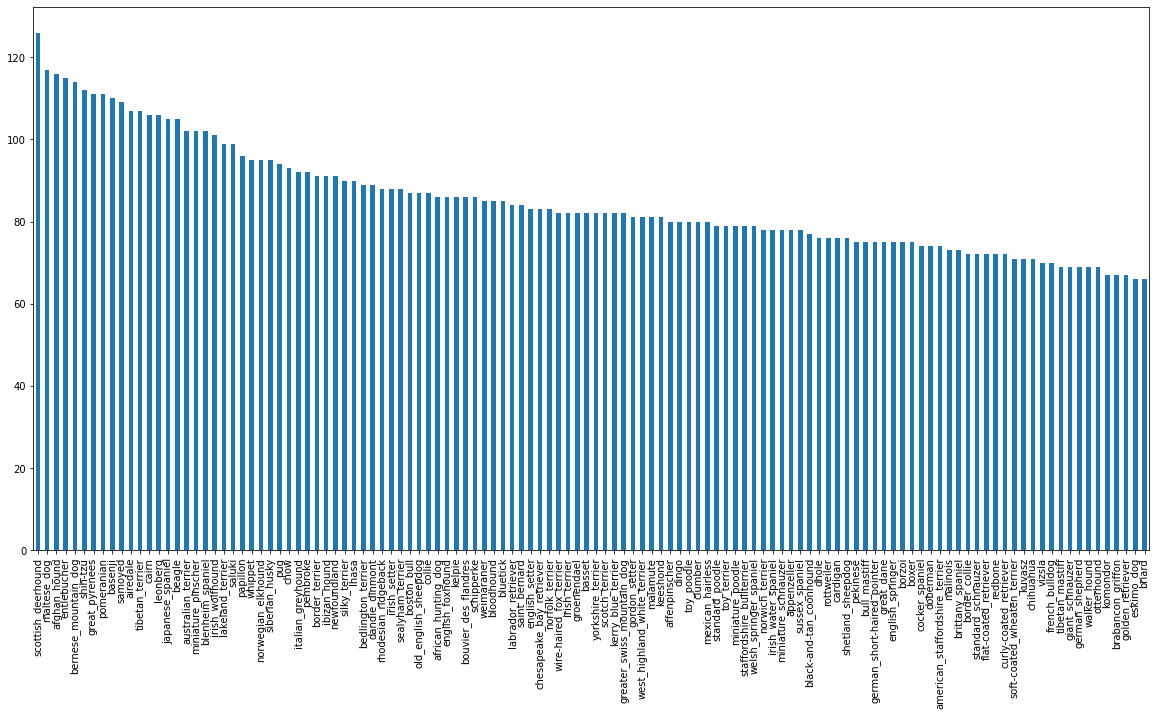

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0